# Parameter Importance Analysis

In [32]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams

In [33]:
plt.rc('figure', figsize=(15, 8))
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
       axisbelow=True, grid=True)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)

In [2]:
def plot_bar_x(labels, data, parameter, title):
    index = np.arange(len(labels))
    plt.bar(index, data)
    plt.xlabel(parameter, fontsize=20)
    plt.ylabel('Accuracy', fontsize=20)
    plt.xticks(index, labels, fontsize=10)
    plt.title(title, fontsize=20)
    plt.show()

## K Nearest Neighbors

In [3]:
knn_df = pd.read_csv('results_knn.csv', index_col='Unnamed: 0')
knn_df.head()

,image_path,class,predicted_class,knn_neighbors,vocabulary_words,normalization
0,imagedb_test\fighter_jet\069_0090.jpg,0,2.0,2,100,False
1,imagedb_test\fighter_jet\069_0091.jpg,0,4.0,2,100,False
2,imagedb_test\fighter_jet\069_0092.jpg,0,0.0,2,100,False
3,imagedb_test\fighter_jet\069_0093.jpg,0,0.0,2,100,False
4,imagedb_test\fighter_jet\069_0094.jpg,0,0.0,2,100,False


In [4]:
for i in range(knn_df.shape[0]):
    if  knn_df.loc[i, 'predicted_class'] == knn_df.loc[i, 'class']:
        knn_df.loc[i, 'prediction_correct'] = 1
    else:
        knn_df.loc[i, 'prediction_correct'] = 0

In [5]:
knn_df['num_images'] = 1

In [6]:
knn_grouped = knn_df.groupby(['class', 'vocabulary_words', 'normalization', 'knn_neighbors']).sum().drop(columns=['predicted_class'])
knn_grouped

prediction_correct  \
class vocabulary_words normalization knn_neighbors                       
0     50               False         2                             2.0   
                                     3                             2.0   
                                     5                             2.0   
                                     7                             2.0   
                                     9                             2.0   
                                     11                            2.0   
                                     17                            2.0   
                                     25                            1.0   
                                     35                            1.0   
                                     45                            1.0   
                                     55                            1.0   
                                     65                            1.0   
                       True          2                             4.0   
                                     3                             4.0   
                                     5                             1.0   
                                     7                             3.0   
                                     9                             1.0   
                                     11                            0.0   
                                     17                            0.0   
                                     25                            0.0   
                                     35                            0.0   
                                     45                            0.0   
                                     55                            0.0   
                                     65                            0.0   
      100              False         2                             6.0   
                                     3                             4.0   
                                     5                             5.0   
                                     7                             4.0   
                                     9                             4.0   
                                     11                            3.0   
...                                                                ...   
5     500              True          17                            0.0   
                                     25                            2.0   
                                     35                            3.0   
                                     45                            4.0   
                                     55                            4.0   
                                     65                            4.0   
      700              False         2                             2.0   
                                     3                             2.0   
                                     5                             0.0   
                                     7                             1.0   
                                     9                             1.0   
                                     11                            1.0   
                                     17                            1.0   
                                     25                            1.0   
                                     35                            0.0   
                                     45                            1.0   
                                     55                            0.0   
                                     65                            0.0   
                       True          2                             0.0   
                                     3                             0.0   
                                     5                             0.0   
                                     7                  

### Class

In [7]:
knn_classes = knn_grouped.groupby('class').sum()

classes_folders = ['fighter_jet', 'motorbike', 'school_bus', 'touring_bike', 'airplane', 'car_side']

ind = knn_classes.index.tolist()
for i in range(len(ind)):
    ind[i] = classes_folders[i]

knn_classes.index = ind
    
knn_classes.loc['average', 'prediction_correct'] = knn_classes['prediction_correct'].sum()
knn_classes.loc['average', 'num_images'] = knn_classes['num_images'].sum()
knn_classes['accuracy'] = knn_classes['prediction_correct'] / knn_classes['num_images']

knn_classes

,prediction_correct,num_images,accuracy
fighter_jet,605.0,2160.0,0.280093
motorbike,787.0,2160.0,0.364352
school_bus,1192.0,1944.0,0.613169
touring_bike,2007.0,2376.0,0.844697
airplane,1982.0,2376.0,0.834175
car_side,1073.0,2376.0,0.451599
average,7646.0,13392.0,0.570938


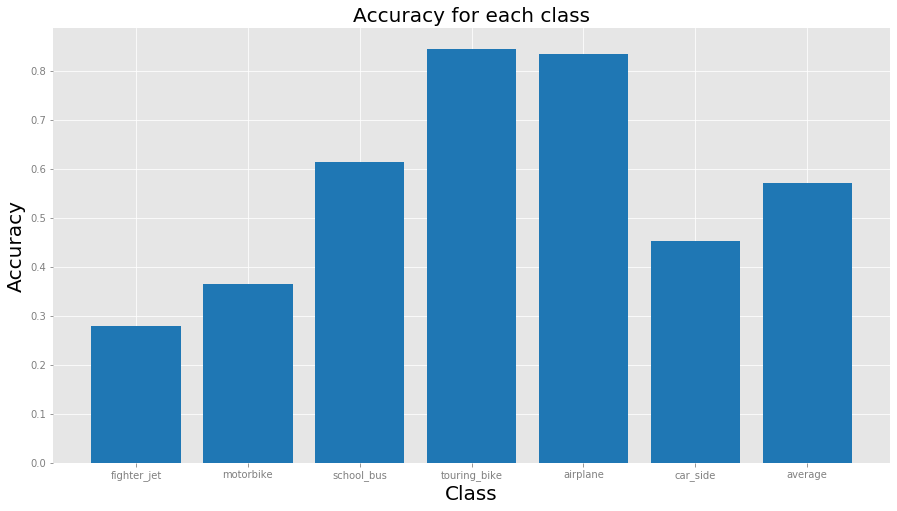

In [34]:
plot_bar_x(knn_classes.index, knn_classes.accuracy.values, 'Class', 'Accuracy for each class')

### Number of Vocabulary Words

In [9]:
knn_words = knn_grouped.groupby('vocabulary_words').sum()

knn_words['accuracy'] = knn_words['prediction_correct'] / knn_words['num_images']

knn_words

,prediction_correct,num_images,accuracy
vocabulary_words,,,
50,913.0,1488,0.613575
100,930.0,1488,0.625000
150,928.0,1488,0.623656
200,898.0,1488,0.603495
250,897.0,1488,0.602823
300,848.0,1488,0.569892
400,791.0,1488,0.531586
500,784.0,1488,0.526882
700,657.0,1488,0.441532


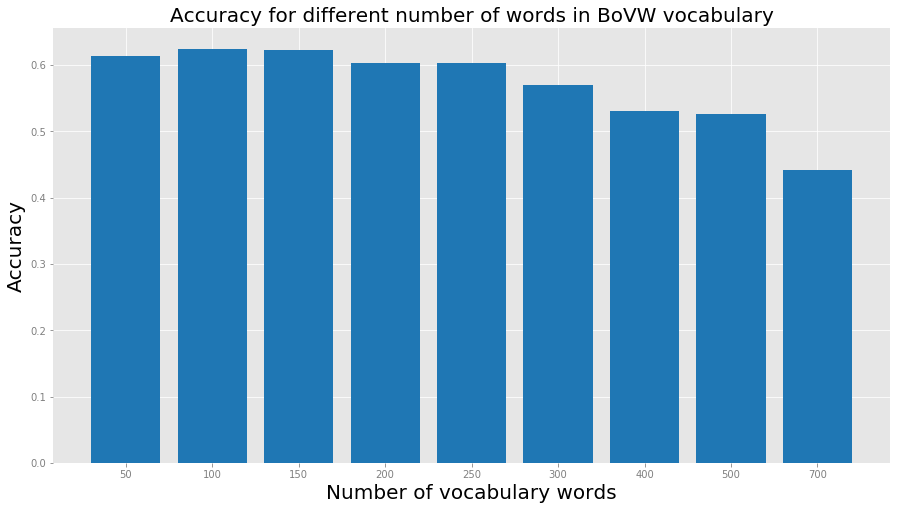

In [35]:
plot_bar_x(knn_words.index, knn_words.accuracy.values, 'Number of vocabulary words', 'Accuracy for different number of words in BoVW vocabulary')

### Normalization

In [11]:
knn_norms = knn_grouped.groupby('normalization').sum()

knn_norms['accuracy'] = knn_norms['prediction_correct'] / knn_norms['num_images']

knn_norms

,prediction_correct,num_images,accuracy
normalization,,,
False,4096.0,6696,0.611708
True,3550.0,6696,0.530167


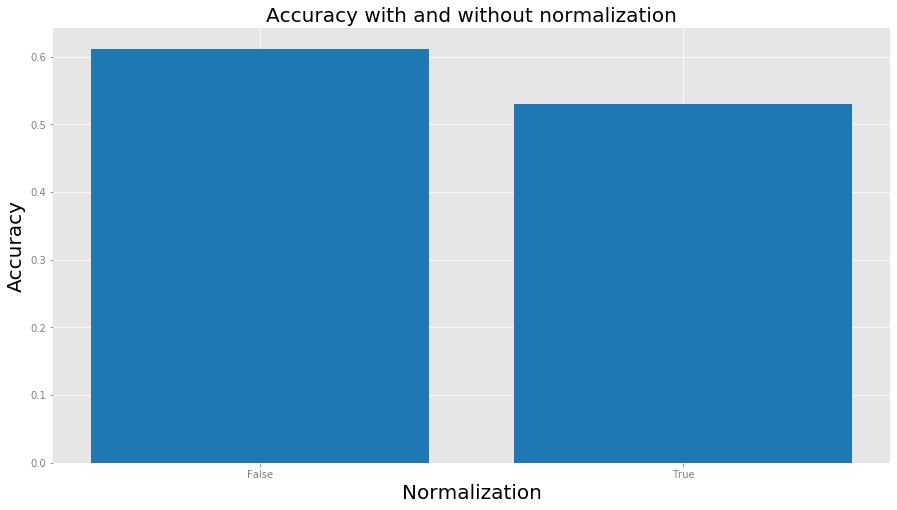

In [36]:
plot_bar_x(knn_norms.index, knn_norms.accuracy.values, 'Normalization', 'Accuracy with and without normalization')

### Number of Neighbors k

In [13]:
ks = knn_grouped.groupby('knn_neighbors').sum()
    
ks.loc['average', 'prediction_correct'] = ks['prediction_correct'].sum()
ks.loc['average', 'num_images'] = ks['num_images'].sum()
ks['accuracy'] = ks['prediction_correct'] / ks['num_images']

In [14]:
ks

,prediction_correct,num_images,accuracy
knn_neighbors,,,
2,599.0,1116.0,0.536738
3,647.0,1116.0,0.579749
5,640.0,1116.0,0.573477
7,649.0,1116.0,0.581541
9,657.0,1116.0,0.588710
11,645.0,1116.0,0.577957
17,630.0,1116.0,0.564516
25,624.0,1116.0,0.559140
35,628.0,1116.0,0.562724


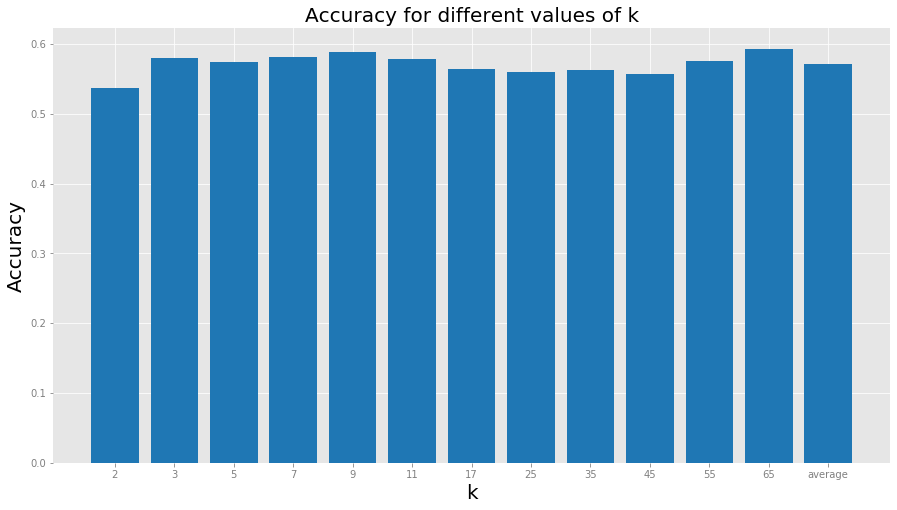

In [37]:
plot_bar_x(ks.index, ks.accuracy.values, 'k', 'Accuracy for different values of k')

## SVM

In [16]:
svm_df = pd.read_csv('results_svm.csv', index_col='Unnamed: 0')
svm_df.head()

,image_path,class,predicted_class,vocabulary_words,normalization,kernel,epsilon
0,imagedb_test/fighter_jet/069_0090.jpg,0,2,50,False,RBF,1.000000e-08
1,imagedb_test/fighter_jet/069_0091.jpg,0,4,50,False,RBF,1.000000e-08
2,imagedb_test/fighter_jet/069_0092.jpg,0,0,50,False,RBF,1.000000e-08
3,imagedb_test/fighter_jet/069_0093.jpg,0,1,50,False,RBF,1.000000e-08
4,imagedb_test/fighter_jet/069_0094.jpg,0,1,50,False,RBF,1.000000e-08


In [17]:
for i in range(svm_df.shape[0]):
    if  svm_df.loc[i, 'predicted_class'] == svm_df.loc[i, 'class']:
        svm_df.loc[i, 'prediction_correct'] = 1
    else:
        svm_df.loc[i, 'prediction_correct'] = 0

In [18]:
svm_df['num_images'] = 1

In [19]:
svm_grouped = svm_df.groupby(['class', 'vocabulary_words', 'normalization', 'kernel', 'epsilon']).sum().drop(columns=['predicted_class'])
svm_grouped

prediction_correct  \
class vocabulary_words normalization kernel  epsilon                            
0     50               False         CHI2    1.000000e-08                 2.0   
                                             1.000000e-06                 2.0   
                                             1.000000e-04                 2.0   
                                             1.000000e-02                 2.0   
                                             1.000000e-01                 2.0   
                                     INTER   1.000000e-08                 4.0   
                                             1.000000e-06                 4.0   
                                             1.000000e-04                 4.0   
                                             1.000000e-02                 4.0   
                                             1.000000e-01                 4.0   
                                     RBF     1.000000e-08                 3.0   
                                             1.000000e-06                 3.0   
                                             1.000000e-04                 3.0   
                                             1.000000e-02                 3.0   
                                             1.000000e-01                 4.0   
                                     SIGMOID 1.000000e-08                 5.0   
                                             1.000000e-06                 5.0   
                                             1.000000e-04                 5.0   
                                             1.000000e-02                 5.0   
                                             1.000000e-01                 5.0   
                       True          CHI2    1.000000e-08                 3.0   
                                             1.000000e-06                 3.0   
                                             1.000000e-04                 3.0   
                                             1.000000e-02                 3.0   
                                             1.000000e-01                 3.0   
                                     INTER   1.000000e-08                 3.0   
                                             1.000000e-06                 3.0   
                                             1.000000e-04                 3.0   
                                             1.000000e-02                 3.0   
                                             1.000000e-01                 3.0   
...                                                                       ...   
5     700              False         RBF     1.000000e-08                10.0   
                                             1.000000e-06                10.0   
                                             1.000000e-04                10.0   
                                             1.000000e-02                10.0   
                                             1.000000e-01                10.0   
                                     SIGMOID 1.000000e-08                 0.0   
                                             1.000000e-06                 0.0   
                                             1.000000e-04                 0.0   
                                             1.000000e-02                 0.0   
                                             1.000000e-01                 0.0   
                       True          CHI2    1.000000e-08                10.0   
                                             1.000000e-06                10.0   
                                             1.000000e-04                10.0   
                                             1.000000e-02                10.0   
                                             1.000000e-01                10.0   
                                     INTER   1.000000e-08                10.0   
                                             1.000000e-06                10.0   
         

### Classes

In [20]:
svm_classes = svm_grouped.groupby('class').sum()

classes_folders = ['fighter_jet', 'motorbike', 'school_bus', 'touring_bike', 'airplane', 'car_side']

ind = svm_classes.index.tolist()
for i in range(len(ind)):
    ind[i] = classes_folders[i]

svm_classes.index = ind
    
svm_classes.loc['average', 'prediction_correct'] = svm_classes['prediction_correct'].sum()
svm_classes.loc['average', 'num_images'] = svm_classes['num_images'].sum()
svm_classes['accuracy'] = svm_classes['prediction_correct'] / svm_classes['num_images']

svm_classes

,prediction_correct,num_images,accuracy
fighter_jet,1324.0,3600.0,0.367778
motorbike,1995.0,3600.0,0.554167
school_bus,1652.0,3240.0,0.509877
touring_bike,2690.0,3960.0,0.679293
airplane,2917.0,3960.0,0.736616
car_side,2515.0,3960.0,0.635101
average,13093.0,22320.0,0.586604


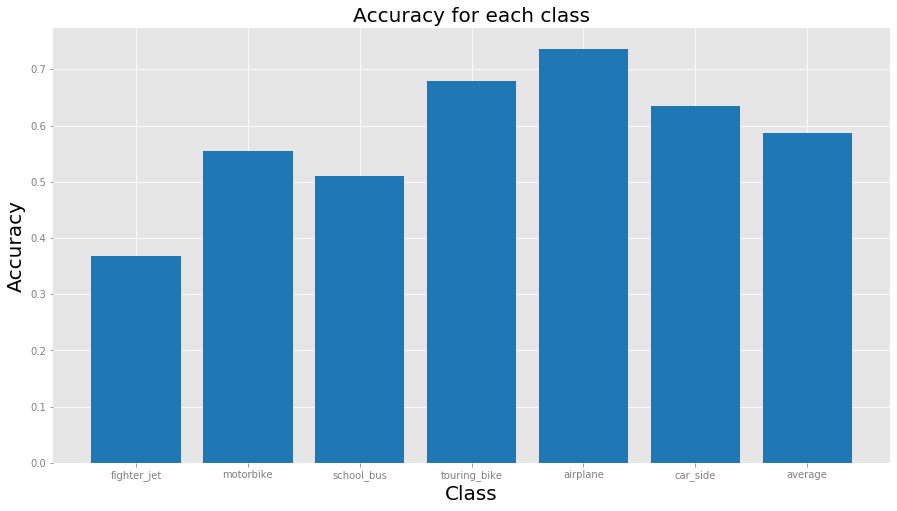

In [38]:
plot_bar_x(svm_classes.index, svm_classes.accuracy.values, 'Class', 'Accuracy for each class')

### Number of Vocabulary Words

In [22]:
svm_words = svm_grouped.groupby('vocabulary_words').sum()

svm_words['accuracy'] = svm_words['prediction_correct'] / svm_words['num_images']

svm_words

,prediction_correct,num_images,accuracy
vocabulary_words,,,
50,1310.0,2480,0.528226
100,1518.0,2480,0.612097
150,1465.0,2480,0.590726
200,1445.0,2480,0.582661
250,1391.0,2480,0.560887
300,1420.0,2480,0.572581
400,1460.0,2480,0.588710
500,1530.0,2480,0.616935
700,1554.0,2480,0.626613


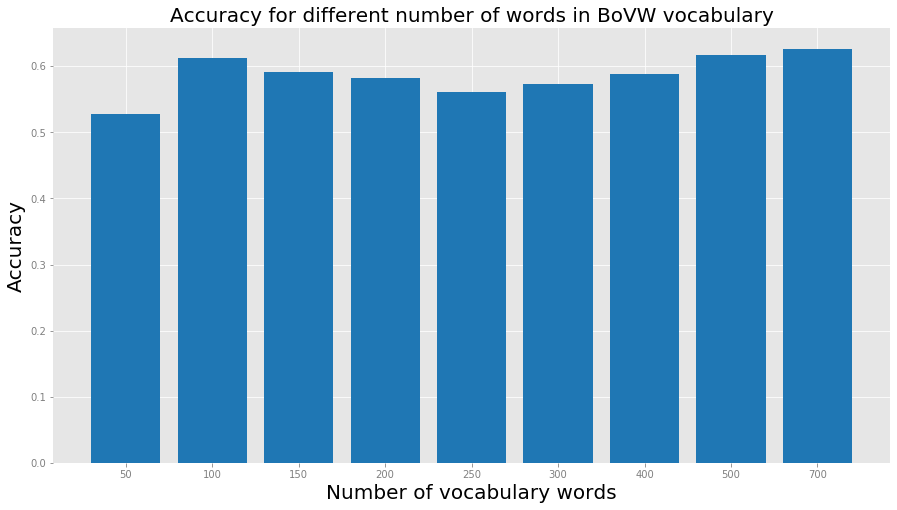

In [39]:
plot_bar_x(svm_words.index, svm_words.accuracy.values, 'Number of vocabulary words', 'Accuracy for different number of words in BoVW vocabulary')

### Normalization

In [24]:
svm_norms = svm_grouped.groupby('normalization').sum()

svm_norms['accuracy'] = svm_norms['prediction_correct'] / svm_norms['num_images']

svm_norms

,prediction_correct,num_images,accuracy
normalization,,,
False,6617.0,11160,0.592921
True,6476.0,11160,0.580287


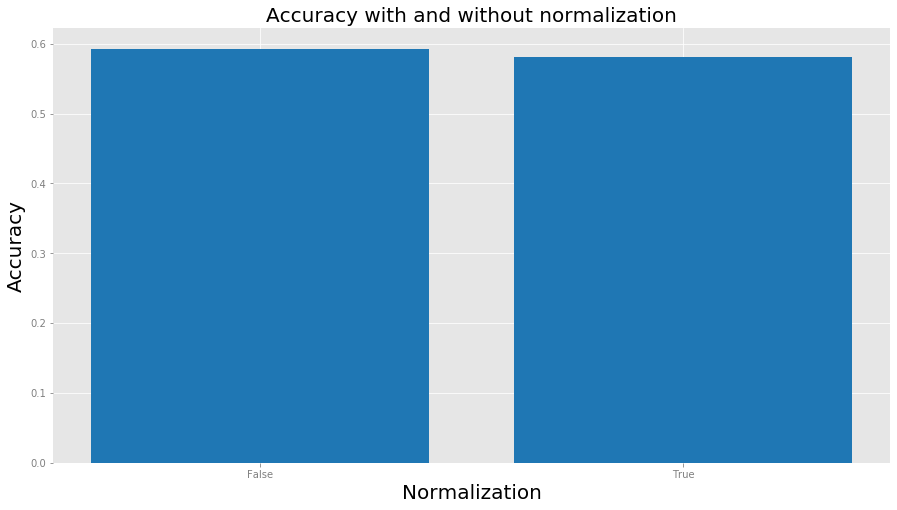

In [40]:
plot_bar_x(svm_norms.index, svm_norms.accuracy.values, 'Normalization', 'Accuracy with and without normalization')

### Kernel

In [26]:
svm_kernel = svm_grouped.groupby('kernel').sum()

svm_kernel['accuracy'] = svm_kernel['prediction_correct'] / svm_kernel['num_images']

svm_kernel

,prediction_correct,num_images,accuracy
kernel,,,
CHI2,4354.0,5580,0.780287
INTER,4249.0,5580,0.761470
RBF,4213.0,5580,0.755018
SIGMOID,277.0,5580,0.049642


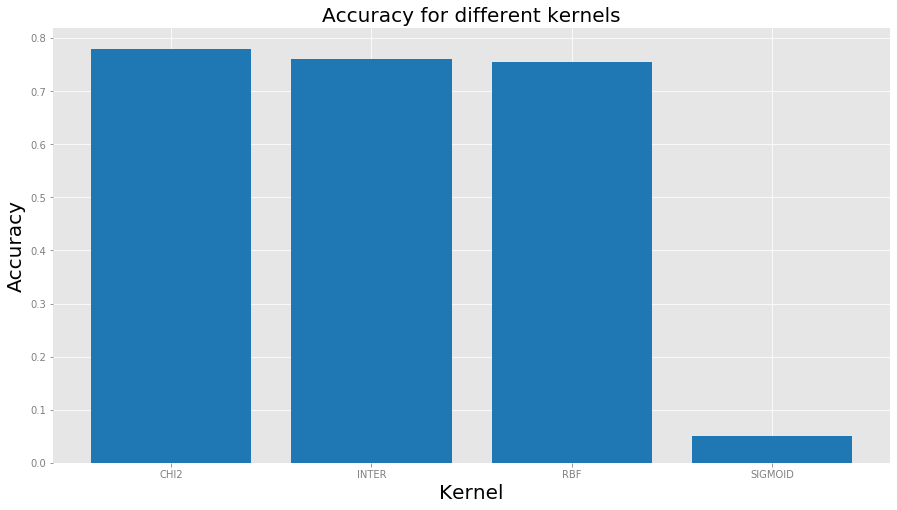

In [41]:
plot_bar_x(svm_kernel.index, svm_kernel.accuracy.values, 'Kernel', 'Accuracy for different kernels')

### Epsilon

In [28]:
svm_eps = svm_grouped.groupby('epsilon').sum()

svm_eps['accuracy'] = svm_eps['prediction_correct'] / svm_eps['num_images']

svm_eps

,prediction_correct,num_images,accuracy
epsilon,,,
1.000000e-08,2623.0,4464,0.587590
1.000000e-06,2619.0,4464,0.586694
1.000000e-04,2609.0,4464,0.584453
1.000000e-02,2623.0,4464,0.587590
1.000000e-01,2619.0,4464,0.586694


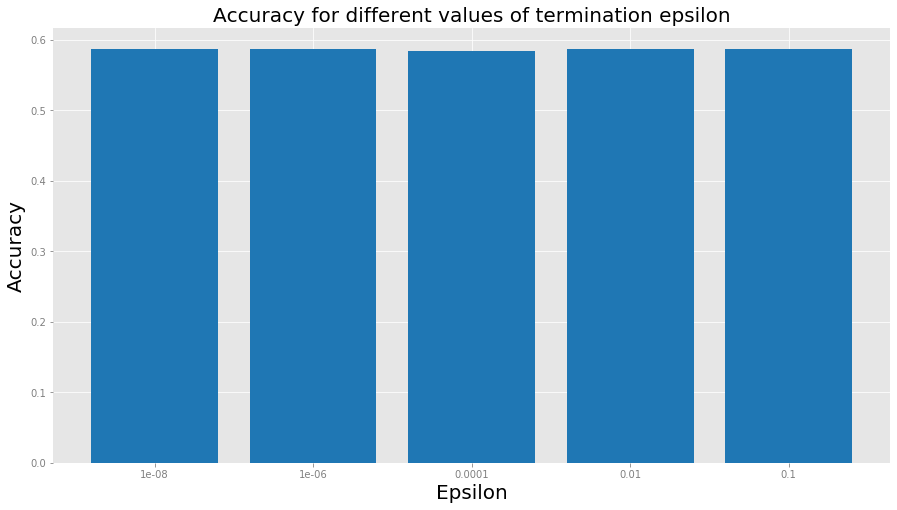

In [42]:
plot_bar_x(svm_eps.index, svm_eps.accuracy.values, 'Epsilon', 'Accuracy for different values of termination epsilon')